#Github link: https://github.com/IamAirmanPhoenix/Sprint7_Project

# INTRODUCTION

On this sections of the project, we will continue with the analysis of the taxi companies activities on November 2017 we started on previous sections with dataminig on a website and using PostgreSQL to obtain datasets we'll be using in the following sections.

Let's see the conclusions we can get with the information we have and comprehend its behaviour.

# 4. Exploratory analysis of data

First of all, it is needed to understand and comprehend the information we have to be able to make a correct analysis and processing of the data.

## 4.1. Importing libraries

Libraries we'll be using for processing and plotting the information.

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

## 4.2. Importing datasets

The datasets we'll be using on the following sections.

In [18]:
result_01 = pd.read_csv('datasets/moved_project_sql_result_01.csv')
result_04 = pd.read_csv('datasets/moved_project_sql_result_04.csv')
result_07 = pd.read_csv('datasets/moved_project_sql_result_07.csv')

## 4.3. Studying datasets

### 4.3.1. Dataset 'results_01'

This dataset has the `relation "name-number of trips"` for each taxi company which had trips on `Novermber 15 & 16, 2017`. The output from code block below may be interpreted with the following statements:

 * Columns names have an adecuate format.
 * Columns data types are correct.
 * There are no apparent missing values.
 * We have no companies with 0 trips.
 
Is needed to apply some more tests on the dataset to prove the last point as true.

In [19]:
print(result_01.head())
print()
print(result_01.info())
print()
print(result_01.describe(include='all'))

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

       company_name  trips_amount
count            64     64.000000
unique           64           NaN
top       Flash Cab           NaN
freq              1           NaN
mean            NaN   2145.484375
std             NaN   3812.310186
min             NaN      2.000000
25%             NaN     20.750000
50%             NaN    178.500000
75%             NaN   2106.500000
max  

Analyzing duplicated values we can see there are no duplicated rows on the dataset overall (either on company_name column and on all the dataset), so there is no more processing necessary on this file.

`NOTE:` This processing does not ignore the numbers on each name, so a not detected 'non-apparent' duplicated value of that kind should be processed with a more detailed processing. 

In [20]:
print(f"¨Quantity of duplicated rows: {result_01.duplicated().sum()}")
print(f"¨Quantity of duplicated company names: {result_01['company_name'].str.lower().duplicated().sum()}")

¨Quantity of duplicated rows: 0
¨Quantity of duplicated company names: 0


### 4.3.2. Dataset 'results_04'

This dataset has the `relation "dropoff location name - average trips"` for all the registered trips `on November 2017`. From the code block output below we can conclude the following: 

 * The column names have an adecuate format.
 * The columns data types are correct.
 * There are not apparent missing values.
 * We have not companies with 0 avg trips.

Let´s apply a similar processing as in 'results_01' dataset and verify we have the information correctly.

In [21]:
print(result_04.head())
print()
print(result_04.info())
print()
print(result_04.describe(include='all'))

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

       dropoff_location_name  average_trips
count                     94      94.000000
unique                    94            NaN
top                     Loop            NaN
freq                       1            NaN
mean                     NaN     599.953728
std                      NaN    1714.591098
min                      NaN       1.800000
25%                      NaN      14.266667
5

We can conclude this dataset has no duplicated values overall. No more processing needed.

`NOTE:` Same as on dataset 'results_01'.

In [22]:
print(f"¨Quantity of duplicated rows: {result_04.duplicated().sum()}")
print(f"¨Quantity of duplicated locations names: {result_04['dropoff_location_name'].str.lower().duplicated().sum()}")

¨Quantity of duplicated rows: 0
¨Quantity of duplicated locations names: 0


### 4.3.3. Dataset 'results_07'

This dataset is the result of a previous consult on PostgreSQL in which we obtained the information of taxi trips `from "Loop" to "O'Hare International Airport" on November 2017`. The data shows the following information:

 * `start_ts`: Start timestamp on "YYYY-MM-DD HH:mm:ss" format rounded to hour.
 * `weather_conditions`: Bad for 'rain related weather' and good for the rest.
 * `duration_seconds`: Trip duration on seconds.

From this dataset we can conclude the following:

 * The column names have an adecuate format.
 * The columns data types are correct, except start_ts which we will change to datetime to make easier the analysis.
 * There are not apparent missing values.
 * We do have trips with durations of 0 seconds.

We still need to apply a processing to assure the information is as we need.

In [23]:
print(result_07.head())
print()
print(result_07.info())
print()
print(result_07.describe(include='all'))

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

                   start_ts weather_conditions  duration_seconds
count                  1068               1068       1068.000000
unique                   81                  2               NaN
top     2017-11-11 10:00:00       

From the code block below we can conclude the following:

 * We have 197 duplicated rows (so we need to delete them).
 * We have two values for 'weather-conditions' column (as we need).

In [24]:
print(f"Quantity of duplicated rows: {result_07.duplicated().sum()}")
print(f"Quantity of values for weather_conditions: {result_07['weather_conditions'].nunique()}, ({list(result_07['weather_conditions'].unique())})")

Quantity of duplicated rows: 197
Quantity of values for weather_conditions: 2, (['Good', 'Bad'])


Once the duplicated rows are deleted, we have the dataset ready to work in.

In [25]:
result_07.drop_duplicates(inplace=True)
print(result_07.info())
print()
print(f"Quantity of duplicated rows: {result_07.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            871 non-null    object 
 1   weather_conditions  871 non-null    object 
 2   duration_seconds    871 non-null    float64
dtypes: float64(1), object(2)
memory usage: 27.2+ KB
None

Quantity of duplicated rows: 0


Now we convert the column data type to datetime.

In [26]:
result_07['start_ts'] = pd.to_datetime(result_07['start_ts'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

Confirming the result is correct and continue. We still have 0 values on it, so we need to filter them on future steps.

In [27]:
print(result_07.info())
print()
print(result_07.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB
None

                             start_ts weather_conditions  duration_seconds
count                             871                871        871.000000
unique                            NaN                  2               NaN
top                               NaN               Good               NaN
freq                              NaN                723               NaN
mean    2017-11-11 20:10:53.042479872                NaN       2096.308840
min               2017-11-04 00:00:00                NaN          0.000000
25%              

## 4.4. Top 10 dropoff locations.

Ordering and filtering the dataset 'results_04' we can obtain a reduced dataframe with the top 10 dropoff locations on November 2017.

In [28]:
top_dropoff = result_04.sort_values(by='average_trips', ascending=False).head(10)
print(top_dropoff)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Following this, we may need to plot the resulting dataframe to better comprehend the information. The following bar chart shows us the difference between the top 10 dropoff locations as the following:

 * The most common dropoff locations are Loop, River North, Streeterville ans West Loop.
 * The remaining locations in the top do not vary as much between them in comparison with the first four.

What may be a reason for this disparity among the 10 most request locations?

The most probable reason may be the activity on those zones. Other reason can be an special event o0r events on those zones on that particular month. This must be a point that shall be discussed on further steps of this analysis.

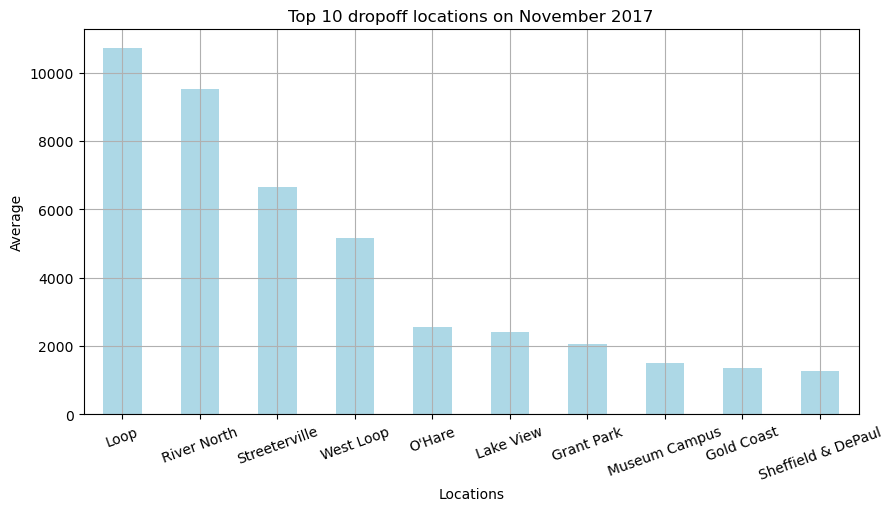

In [29]:
top_dropoff.plot(kind='bar',
                 x='dropoff_location_name',
                 xlabel='Locations',
                 ylabel='Average',
                 title='Top 10 dropoff locations on November 2017',
                 rot=20,
                 grid=True,
                 figsize=[10,5],
                 legend=False,
                 color='lightblue')

plt.show()

By the hand of the bar chart we generate, we can use a boxplot diagram to complement the information.

We do not have atypical values in the top 10 locations list, but we do have a remarcable asymmetry on the population. We can see the range of the data below the 50th percentile is more narrow than data above it, causing a huge `difference between our mean and median values of 1841 average trips aprox` (as seen below).

<Axes: >

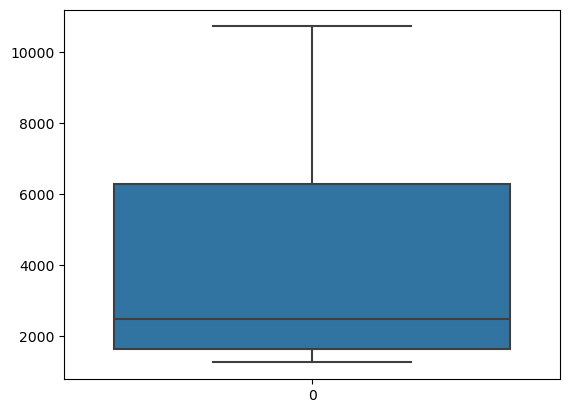

In [45]:
sns.boxplot(top_dropoff['average_trips'])

In [31]:
print(f"The mean value of the population is: {top_dropoff['average_trips'].mean()}.")
print(f"The median value of the population is: {top_dropoff['average_trips'].median()}.")
print()
print(f"The difference between them is: {abs(top_dropoff['average_trips'].mean() - top_dropoff['average_trips'].median())}")

The mean value of the population is: 4324.986666666667.
The median value of the population is: 2483.9333333333334.

The difference between them is: 1841.0533333333333


CONCLUSION:

We may want to exclude the top 4 locations for other types of analysis in which we may want to include all others locations due to the huge difference between those locations values and the others locations values. In other hand, this does not mean we cannot use those 4 locations to propose another strategy in particular.

## 4.5. Top 10 taxi companies

Ordering and filtering the dataset 'results_01' to obtain only the information we want.

In [32]:
top_companies = result_01.sort_values(by='trips_amount', ascending=False).head(10)
print(top_companies)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


Plotting the obtained dataframe we can conclude the following statements: 

 * The difference between the first place company of the list and the others is anormaly huge.
 * The values for the remaining companies does not vary much between them.

With this in hand, is obvious Flash Cab (the company with most trips on November 15/16, 2017) was the customers favorite, but the reason is not known yet. May this imply Flash Cab had an special promotion on those specific days? Or this may be caused by external factors to Flash Cab company? This should be discused in the future to determined if the cause of this disparity may used in favor of other companies.

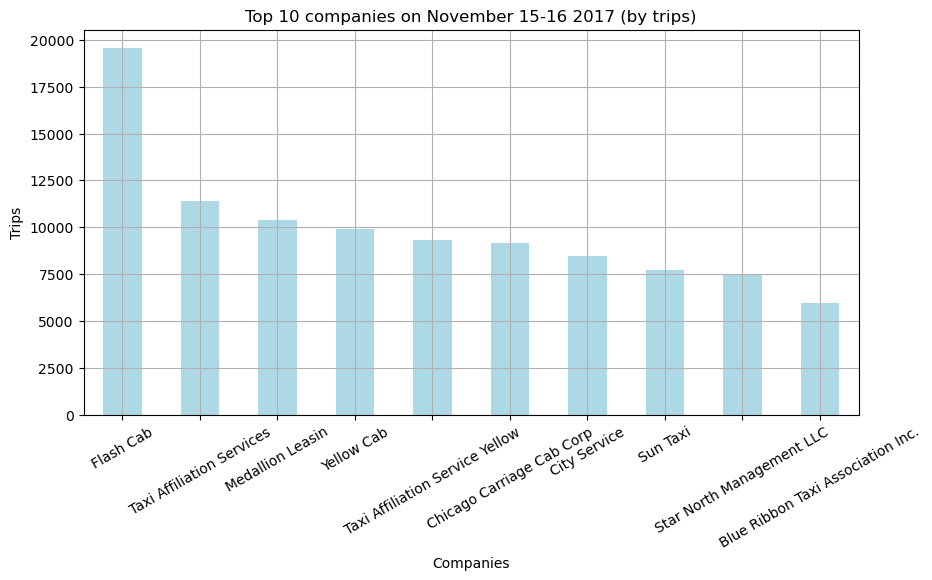

In [33]:
top_companies.plot(kind='bar',
                 x='company_name',
                 xlabel='Companies',
                 ylabel='Trips',
                 title='Top 10 companies on November 15-16 2017 (by trips)',
                 rot=30,
                 grid=True,
                 figsize=[10,5],
                 legend=False,
                 color='lightblue')

plt.show()

As well as in previous dataset, creating a boxplot may help complimenting the current information.

In this specific case, we can see the previously discussed trips value for Flash Cab is an atypical value within the population, so maybe this can be evidence the data from Flash Cab should by used separately from the other values. Once done this, we can see the range of the data does not vary significantly, and also has an asymmetry to the values above the 50th percentile (causing a minor difference between the mean and median values of aproximately 687 trips as shown below).

<Axes: >

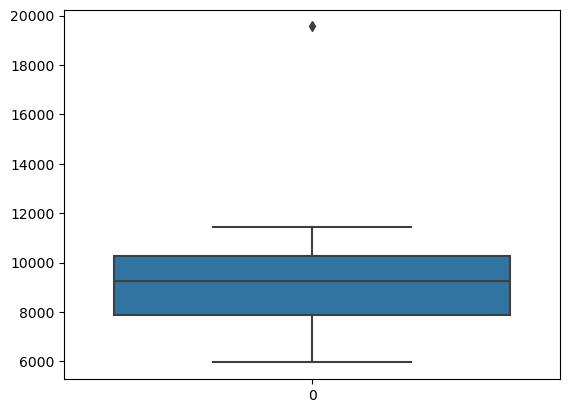

In [46]:
sns.boxplot(top_companies['trips_amount'])

In [35]:
print(f"The mean value of the population is: {top_companies['trips_amount'].mean()}.")
print(f"The median value of the population is: {top_companies['trips_amount'].median()}.")
print()
print(f"The difference between them is: {abs(top_companies['trips_amount'].mean() - top_companies['trips_amount'].median())}")

The mean value of the population is: 9927.2.
The median value of the population is: 9240.0.

The difference between them is: 687.2000000000007


CONCLUSION:

We may infer the difference between Flash Cab is not typical (also because the boxplot shows us that), but it is necessary to do further investigation on days November 15/16, 2017 to be sure what caused this anormality on favor of Flash Cab.

# 5. Hyphotesis tests

On this section, the dataset 'results_07' will be used to make the required statistical tests.

In [36]:
print(result_07)

                start_ts weather_conditions  duration_seconds
0    2017-11-25 16:00:00               Good            2410.0
1    2017-11-25 14:00:00               Good            1920.0
2    2017-11-25 12:00:00               Good            1543.0
3    2017-11-04 10:00:00               Good            2512.0
4    2017-11-11 07:00:00               Good            1440.0
...                  ...                ...               ...
1060 2017-11-04 14:00:00               Good            2700.0
1061 2017-11-18 16:00:00                Bad            2186.0
1063 2017-11-25 11:00:00               Good               0.0
1064 2017-11-11 10:00:00               Good            1318.0
1067 2017-11-04 16:00:00                Bad            2834.0

[871 rows x 3 columns]


## 5.1. Does the avg. duration of trips from Loop to O'Hare International Airport change on rainy Saturdays?

To answer this question we must define our null hyphotesis and alternate hyphotesis:

 * `NULL HYPHOTESIS`: The avg. duration of trips from Loop to O'Hare International Airport `DOES change` on rainy Saturdays.
 * `ALTERNATE HYPHOTESIS`: The avg. duration of trips from Loop to O'Hare International Airport `DOES NOT change` on rainy Saturdays.

With this in mind, let's prepare the data. First of all, let's see if all the values we have in our datasets are from Saturdays checking on their 'day' value.

In [37]:
result_07['start_ts'].dt.day.unique()

array([25,  4, 11, 18], dtype=int32)

With this code we can see the unique values for the days are (4, 11, 18, 25) which we can say are all Saturdays days.

Once this done, let's make two populations for this test:

 * Saturdays trips with rainy weather.
 * Saturdays trips without rainy weather.

To make this possible, we'll create a new column 'hour' in which the values of the hour of all the trips will be contained.

In [38]:
result_07['hour'] = result_07['start_ts'].dt.hour

We then create two DataFrames: One for the rainy days and one for the days there was no rain (excluding the trips with a registered duration of 0 seconds for both of them).

In [40]:
# DataFrame for trips on rain condition
sat_rain = result_07[(result_07['weather_conditions'] == 'Bad') & (result_07['duration_seconds'] > 0)]

# DataFrame for trips on good condition
sat_norain = result_07[(result_07['weather_conditions'] == 'Good') & (result_07['duration_seconds'] > 0)]

Because we need to prove the difference on a population for a variable, we can conclude the 2 DataFrames we have are RELATED SAMPLES so we have to use a statistical test according with our samples: for example 'ttest_rel()' function. For this test I'll be using an alpha value of 5% (0.05).

As we have different lenghts on both populations, we cannot apply any test on them yet. We will group them by hour and get the avg for both DFs.

In [41]:
piv_rain = sat_rain.pivot_table(index='hour',
                                values='duration_seconds',
                                aggfunc='mean')

piv_norain = sat_norain.pivot_table(index='hour',
                                    values='duration_seconds',
                                    aggfunc='mean')

As we can see, we do not have information for trips with rain for all the 24 hours of the day, so we need to take only the hours we can compare with our 'rainy trips' values.

In [42]:
print(len(piv_rain))
print()
print(len(piv_norain))

11

23


In this way, we create a new table in which we only have the hours we can compare.

In [43]:
piv_norain_filt = piv_norain.loc[piv_rain.index]

Once with the information as we need, let's apply the t-test and determine if we shall accept or reject the null hyphotesis. In case we obtain a p-value above the alpha value we will reject the null hyphotesis (because this means both means are likely to match each other), if not we will accept it.

In [44]:
alpha = 0.05

test = st.ttest_rel(piv_norain_filt, piv_rain)

if test.pvalue > alpha:
    print(f"REJECTTING NULL HYPHOTESIS. P-value ({test.pvalue}) higher that 5%.")
else:
    print(f"ACEPTING NULL HYPHOTESIS. P-value ({test.pvalue}) lower that 5%.")

REJECTTING NULL HYPHOTESIS. P-value ([0.73191343]) higher that 5%.


With the following information we can concluded the following:

 * We `REJECT the null hyphotesis` and `ACCEPT the alternate hyphotesis`. So, The avg. duration of trips from Loop to O'Hare International Airport `DOES NOT change` on rainy Saturdays.

# 6. GENERAL CONCLUSIONS

As conclusion, we can state de following points of the Sprint 7 project:

 * Datamining (or scrapping) is a powerful tool we can use to obtain information from web-sites and APIs. We can obtain the    information on HTML or json formats.
 * SQL based softwares (as PostgreSQL which we used on this project) can help us to generate new information using "general    information" from the case. As an example: How we obtained the information of the taxi companies trips on November using    as reference tables of 'companies by id', 'trips on November' and 'weather conditions'.
 * Once the ionformation is obtained as 'clean' as we can, then we can analyze and study it to give conclusions for a specific question    and apply various statistical tests to complement our answers.
 
The integration of all the previous points helps us not only to make our work more efficient, also simplier to others to unserstand and explain how our working process was and explain the 'why?' of our conclusions.